In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.applications import VGG16
import os

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
base_dir = '/home/camaro/Desktop/pneumonia_detec/chest_xray/chest_xray'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [3]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 63s 634ms/step - loss: 0.3158 - acc: 0.8557 - val_loss: 0.3007 - val_acc: 0.8750
Epoch 2/100
100/100 [==============================] - 50s 505ms/step - loss: 0.2008 - acc: 0.9130 - val_loss: 0.3924 - val_acc: 0.8750
Epoch 3/100
100/100 [==============================] - 44s 443ms/step - loss: 0.1892 - acc: 0.9235 - val_loss: 0.4077 - val_acc: 0.8125
Epoch 4/100
100/100 [==============================] - 34s 345ms/step - loss: 0.1755 - acc: 0.9330 - val_loss: 0.4653 - val_acc: 0.8125
Epoch 5/100
100/100 [==============================] - 33s 333ms/step - loss: 0.1420 - acc: 0.9490 - val_loss: 0.5705 - val_acc: 0.7500
Epoch 6/100
100/100 [==============================] - 34s 344ms/step - loss: 0.1543 - acc: 0.9365 - val_loss: 0.5328 - val_acc: 0.7500
Epoch 7/100
100/100 [==============================] - 33s 335ms/step - loss: 0.1449 - acc: 0.9495 - v

100/100 [==============================] - 36s 360ms/step - loss: 0.0596 - acc: 0.9765 - val_loss: 0.2053 - val_acc: 0.9375
Epoch 61/100
100/100 [==============================] - 38s 381ms/step - loss: 0.0715 - acc: 0.9765 - val_loss: 0.4370 - val_acc: 0.7500
Epoch 62/100
100/100 [==============================] - 36s 362ms/step - loss: 0.0667 - acc: 0.9755 - val_loss: 0.3117 - val_acc: 0.8750
Epoch 63/100
100/100 [==============================] - 35s 350ms/step - loss: 0.0545 - acc: 0.9790 - val_loss: 0.3464 - val_acc: 0.8125
Epoch 64/100
100/100 [==============================] - 35s 349ms/step - loss: 0.0745 - acc: 0.9730 - val_loss: 0.2457 - val_acc: 0.8750
Epoch 65/100
100/100 [==============================] - 34s 342ms/step - loss: 0.0710 - acc: 0.9720 - val_loss: 0.2029 - val_acc: 0.9375
Epoch 66/100
100/100 [==============================] - 34s 339ms/step - loss: 0.0617 - acc: 0.9764 - val_loss: 0.5818 - val_acc: 0.6875
Epoch 67/100
100/100 [==============================] 

In [5]:
model.save('pneumonia_finetune_vgg16.h5')

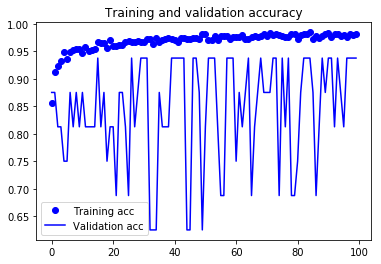

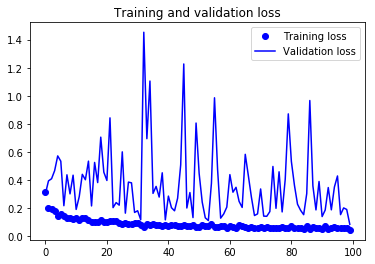

In [7]:
import matplotlib.pyplot as plt
% matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()